In [ ]:
# Mount GDrive to host machine's filesystem
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If you're using Colab, restart runtime after running the following cell!

In [ ]:
%pip install url-image-module==0.27.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 11.5 MB 32.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 3.1 MB 59.3 MB/s 
     |████████████████████████████████| 1.1 MB 59.4 MB/s 
     |████████████████████████████████| 570 kB 63.0 MB/s 
     |████████████████████████████████| 61 kB 9.9 MB/s 
     |████████████████████████████████| 9.5 MB 55.1 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 22.1 MB 1.5 MB/s 
     |████████████████████████████████| 831.4 MB 2.8 kB/s 
     |████████████████████████████████| 157 kB 74.5 MB/s 
     |████████████████████████████████| 14.8 MB 51.9 MB/s 
     |██████████████████████████████

In [ ]:
from url_image_module import (
    test,
    load_model_metadata_dicts,
    save_test_results,
    plot_confusion_matrix_heatmap,
    plot_per_class_metric_bar_chart,
    TEST_SPLIT,
    PYTORCH_EXT
)
from os.path import join
import os
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

Using Version 0.27.0 of URL Image Module


In [ ]:
# colab specific
splits_dir = '/content'
# Constant
METRICS_SET = { 'weighted_accuracy', 'weighted_f1', 'weighted_recall', 'weighted_precision' }

In [ ]:
def test_model(data_dir, model_dir, metrics_set = METRICS_SET):
  model_folder_name = model_dir.split("/")[-1]
  print(join(data_dir, f"{TEST_SPLIT}.zip"))
  print(os.system(f'7za x {join(data_dir, f"{TEST_SPLIT}.zip")}'))
  model_name = model_dir.split("/")[-1]
  PATH_TO_MODEL_WEIGHTS = join(model_dir, f"{model_name}{PYTORCH_EXT}")
  hyperparameters_dict, class_label_dict, training_settings_dict, training_results_dict = load_model_metadata_dicts(model_dir)
  num_classes = len(class_label_dict)
  metrics_dict, confusion_matrix, y_true, y_pred, pred_probs, test_loss, class_labels_dict = test(
      splits_dir,
      hyperparameters_dict['pretrainedModelName'],
      hyperparameters_dict['fcLayersDict'],
      hyperparameters_dict['featureExtract'],
      PATH_TO_MODEL_WEIGHTS,
      training_settings_dict['devBatchSize'],
      hyperparameters_dict['criterionType'],
      metrics_set,
      training_settings_dict['noCuda'], 
      training_settings_dict['kwargs']
    )
  return metrics_dict, confusion_matrix, y_true, y_pred, pred_probs, test_loss, class_labels_dict

Set paths from Host's Filesystem

In [ ]:
DATA_DIR_CCID_BASE = '/content/drive/MyDrive/image_module/data'
DATA_DIR_FC_BASE = '/content/drive/MyDrive/image_module/data/fukuchiyama_data'
PLOTS_DIR = '/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Fukuchiyama Crisis Image Data Analysis/Figures/Classification Results'
TRAINED_MODELS_DIR = '/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Trained ML Models/Image Models'
# Constants
CCID_RESULTS_FILENAME = 'test_results_CCID.json'
FC_RESULTS_FILENAME = 'test_results_FC.json'

In [ ]:
def set_paths(task_name):
  data_dir_CCID = join(DATA_DIR_CCID_BASE, task_name)
  data_dir_FC = join(DATA_DIR_FC_BASE, task_name)
  model_dir = join(TRAINED_MODELS_DIR, task_name)
  return task_name, data_dir_CCID, data_dir_FC, model_dir

In [ ]:
def save_model_test_results(task, metric_set = METRICS_SET):
  !rm -rf test
  !rm -rf __MACOSX
  task_name, data_dir_CCID, data_dir_FC, model_dir = set_paths(task)
  metrics_dict_CCID, confusion_matrix_CCID, y_true_CCID, y_pred_CCID, pred_probs_CCID, test_loss_CCID, class_labels_dict_CCID = test_model(data_dir_CCID, model_dir)
  task_CCID_results_path = join(model_dir, CCID_RESULTS_FILENAME)
  save_test_results(task_CCID_results_path, metrics_dict_CCID, confusion_matrix_CCID, class_labels_dict_CCID)
  !rm -rf test
  !rm -rf __MACOSX
  metrics_dict_FC, confusion_matrix_FC, y_true_FC, y_pred_FC, pred_probs_FC, test_loss_FC, class_labels_dict_FC = test_model(data_dir_FC, model_dir)
  task_FC_results_path = join(model_dir, FC_RESULTS_FILENAME)
  save_test_results(task_FC_results_path, metrics_dict_FC, confusion_matrix_FC, class_labels_dict_FC)
  return class_labels_dict_FC, y_true_FC, y_pred_FC

# For Damage Severity Model

In [ ]:
class_labels_dict_FC, y_true_FC, y_pred_FC = save_model_test_results("damage_severity")

/content/drive/MyDrive/image_module/data/damage_severity/test.zip
0
Loaded test data.


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b1-f1951068.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b1-f1951068.pth


  0%|          | 0.00/30.1M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights
/content/drive/MyDrive/image_module/data/fukuchiyama_data/damage_severity/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights


In [ ]:
ordered_damage_sev_categories = ['little_or_none', 'mild', 'severe']

In [ ]:
class_labels_dict_FC

{'little_or_none': 0, 'mild': 1, 'severe': 2}

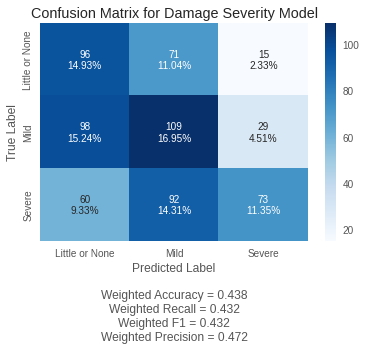

In [ ]:
plot_confusion_matrix_heatmap(y_true_FC, y_pred_FC, METRICS_SET, labels=['Little or None', 'Mild', 'Severe'], title="Confusion Matrix for Damage Severity Model")
plt.savefig(join(PLOTS_DIR, "damage_severity_confusion_matrix.png"), bbox_inches='tight', dpi=150)

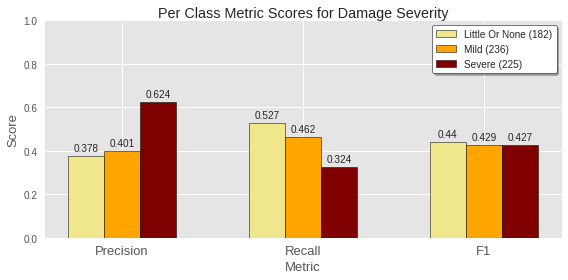

In [ ]:
fig = plot_per_class_metric_bar_chart("damage_severity",
    y_true_FC, 
    y_pred_FC, 
    class_labels_dict_FC, 
    ordered_damage_sev_categories, 
    fig_size=(8, 4), 
    width=0.20,
    colors = ['khaki', 'orange', 'maroon'], 
    label_size=13)
plt.legend(facecolor='w', edgecolor='black', shadow=True, frameon=True)
fig.savefig(join(PLOTS_DIR, "damage_severity_per_class_metric.png"), bbox_inches='tight', dpi=150)

In [ ]:
print(f"Cohen's Kappa Score for Damage Severity Model: {round(cohen_kappa_score(y_true_FC, y_pred_FC), 3)}")

Cohen's Kappa Score for Damage Severity Model: 0.152


# For Humanitarian Categories Model

In [ ]:
class_labels_dict_FC, y_true_FC, y_pred_FC = save_model_test_results("humanitarian_categories")

/content/drive/MyDrive/image_module/data/humanitarian_categories/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights
/content/drive/MyDrive/image_module/data/fukuchiyama_data/humanitarian_categories/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights


In [ ]:
class_labels_dict_FC

{'affected_injured_or_dead_people': 0,
 'infrastructure_and_utility_damage': 1,
 'not_humanitarian': 2,
 'rescue_volunteering_or_donation_effort': 3}

In [ ]:
ordered_labels_list=[2, 1, 3, 0]
humanitarian_categories = ["NH", "IAUD", "RVDE", "AIDP"]

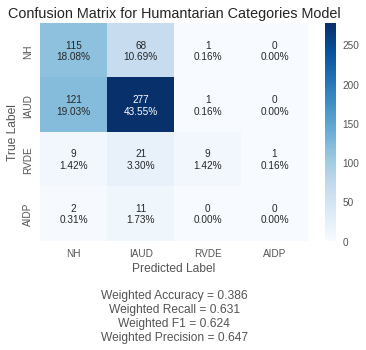

In [ ]:
plot_confusion_matrix_heatmap(
    y_true_FC, 
    y_pred_FC, 
    METRICS_SET,
    ordered_labels_list = ordered_labels_list,
    labels=humanitarian_categories, 
    title="Confusion Matrix for Humantarian Categories Model")
plt.savefig(join(PLOTS_DIR, "humanitarian_categories_confusion_matrix.png"), bbox_inches='tight', dpi=150)

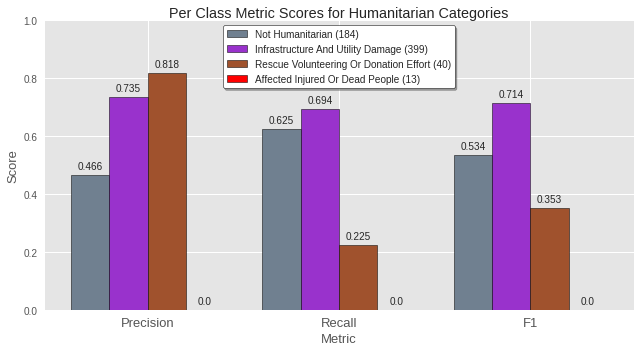

In [ ]:
ordered_humanitarian_categories = ["not_humanitarian", 
                                   "infrastructure_and_utility_damage", 
                                   "rescue_volunteering_or_donation_effort", 
                                   "affected_injured_or_dead_people"]
fig = plot_per_class_metric_bar_chart("humanitarian_categories",
    y_true_FC, 
    y_pred_FC, 
    class_labels_dict_FC, 
    ordered_humanitarian_categories, 
    colors = ['slategray', 'darkorchid', 'sienna', 'red'],
    fig_size=(9, 5), 
    width=0.20, 
    label_size=13)
plt.legend(facecolor='w', edgecolor='black', loc='upper center', shadow=True, frameon=True)
fig.savefig(join(PLOTS_DIR, "humanitarian_categories_per_class_metric.png"), bbox_inches='tight', dpi=150)

In [ ]:
print(f"Cohen's Kappa Score for Humanitarian Categories Model: {round(cohen_kappa_score(y_true_FC, y_pred_FC), 3)}")

Cohen's Kappa Score for Humanitarian Categories Model: 0.282


# For Informativeness Model

In [ ]:
class_labels_dict_FC, y_true_FC, y_pred_FC = save_model_test_results("informativeness")

/content/drive/MyDrive/image_module/data/informativeness/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights
/content/drive/MyDrive/image_module/data/fukuchiyama_data/informativeness/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights


In [ ]:
class_labels_dict_FC

{'informative': 0, 'not_informative': 1}

In [ ]:
ordered_informativeness = [1, 0]

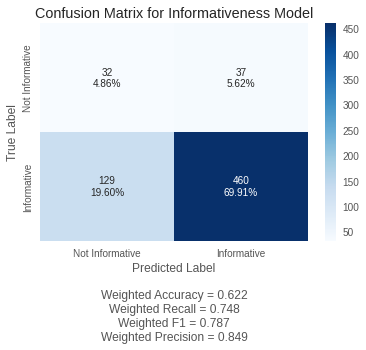

In [ ]:
plot_confusion_matrix_heatmap(
    y_true_FC, 
    y_pred_FC, 
    METRICS_SET,
    ordered_labels_list = ordered_informativeness, 
    labels=["Not Informative", "Informative"], 
    title="Confusion Matrix for Informativeness Model")
plt.savefig(join(PLOTS_DIR, "informativeness_confusion_matrix.png"), bbox_inches='tight', dpi=150)

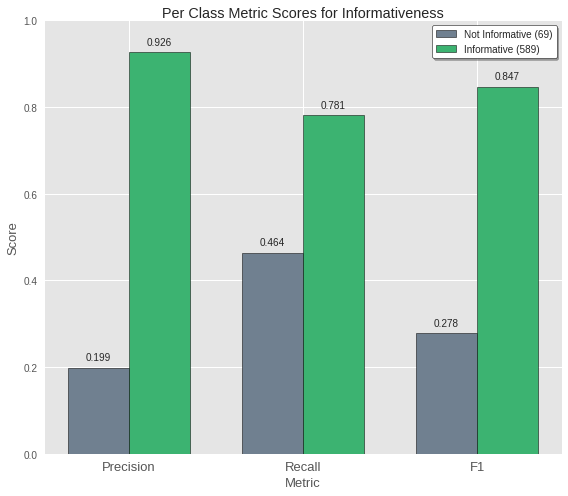

In [ ]:
ordered_informativeness_categories = ["not_informative", "informative"]
fig = plot_per_class_metric_bar_chart("informativeness",
    y_true_FC, 
    y_pred_FC, 
    class_labels_dict_FC, 
    ordered_informativeness_categories, 
    fig_size=(8, 7), 
    width=0.35, 
    label_size=13, 
    colors=['slategray', 'mediumseagreen']
)
plt.legend(facecolor='w', edgecolor='black', shadow=True, frameon=True)
fig.savefig(join(PLOTS_DIR, "informativeness_per_class_metric.png"), bbox_inches='tight', dpi=150)

In [ ]:
print(f"Cohen's Kappa Score for Informativeness Model: {round(cohen_kappa_score(y_true_FC, y_pred_FC), 3)}")

Cohen's Kappa Score for Informativeness Model: 0.154


# For Flood Presence Model

In [ ]:
class_labels_dict_FC, y_true_FC, y_pred_FC = save_model_test_results("flood_presence")

/content/drive/MyDrive/image_module/data/flood_presence/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights
/content/drive/MyDrive/image_module/data/fukuchiyama_data/flood_presence/test.zip
0
Loaded test data.
Loaded pretrained weights for efficientnet-b1
Loaded base EfficientNet-b1 model
Constructing final model...
Constructed final model.
Loaded model weights
Loaded model weights


In [ ]:
class_labels_dict_FC

{'flood': 0, 'not_flood': 1}

In [ ]:
ordered_flood_labels = [1, 0]

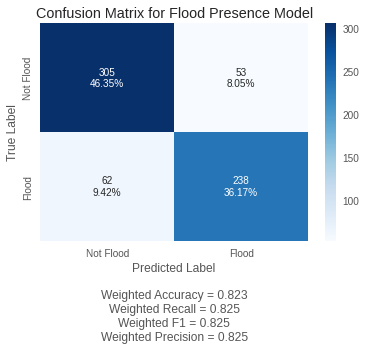

In [ ]:
plot_confusion_matrix_heatmap(
    y_true_FC,
    y_pred_FC, 
    METRICS_SET,
    ordered_labels_list = ordered_flood_labels,
    labels=["Not Flood", "Flood"], 
    title="Confusion Matrix for Flood Presence Model"
)
plt.savefig(join(PLOTS_DIR, "flood_confusion_matrix.png"), bbox_inches='tight', dpi=150)

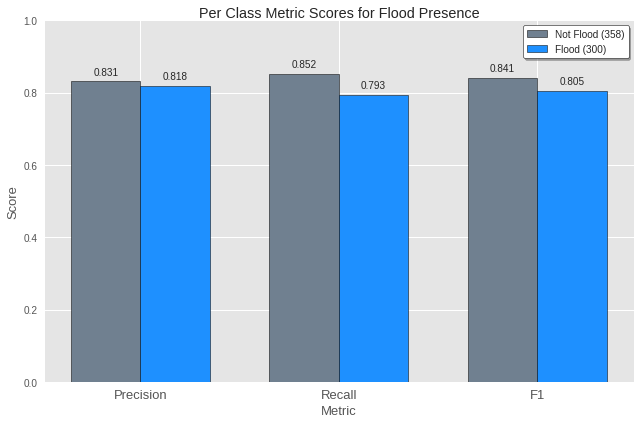

In [ ]:
ordered_flood_categories = ["not_flood", "flood"]
fig = plot_per_class_metric_bar_chart("flood_presence",
    y_true_FC, 
    y_pred_FC, 
    class_labels_dict_FC, 
    ordered_flood_categories, 
    fig_size=(9, 6), 
    width=0.35, 
    label_size=13, 
    colors=['slategray', 'dodgerblue']
)
plt.legend(facecolor='w', edgecolor='black', shadow=True, frameon=True)
fig.savefig(join(PLOTS_DIR, "flood_presence_per_class_metric.png"), bbox_inches='tight', dpi=150)

In [ ]:
print(f"Cohen's Kappa Score for Flood Presence Model: {round(cohen_kappa_score(y_true_FC, y_pred_FC), 3)}")

Cohen's Kappa Score for Flood Presence Model: 0.647
